### 1 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

* Построить точечный график  
* Рассчитать коэффициенты корреляции Пирсона и Спирмена  
* Построить модель линейной регрессии  
* Рассчитать коэффициент детерминации  
* Вывести график остатков 


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
%matplotlib inline

In [15]:
water = pd.read_csv('water.csv')

In [20]:
water.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


##### Построить точечный график

<Figure size 1152x720 with 0 Axes>

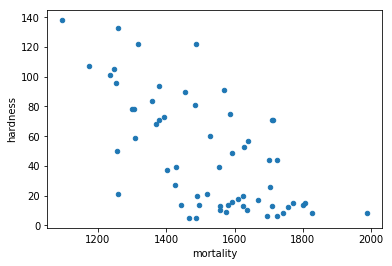

In [81]:
plt.figure(figsize=(16, 10))
water.plot(kind='scatter', x='mortality', y='hardness')
# из графика видно, что есть зависимость между смертностью и жесткостью воды
# в целом можно сказать, что чем выше жесткость воды, тем ниже смертность.

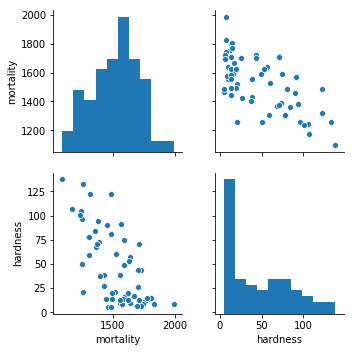

In [84]:
sns.pairplot(water[['mortality', 'hardness']])

##### Рассчитать коэффициенты корреляции Пирсона и Спирмена

In [73]:
# коэффициенты корреляции Пирсона
water[['mortality', 'hardness']].corr(method='pearson')
#видим, что связь между признаками средняя отрицательная, то есть чем выше жесткость воды, тем ниже смертность

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [91]:
# коэффициенты корреляции Спирмена
water[['mortality', 'hardness']].corr(method='spearman')
# тоже самое с коэфф Спирмена, при этом в данном случае корреляция чуть меньше

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


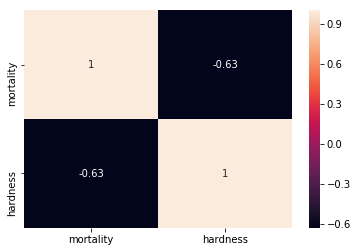

In [94]:
sns.heatmap(water[['mortality', 'hardness']].corr(method='spearman'), annot=True)

##### Построить модель линейной регрессии

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [141]:
X = water[['hardness']] # на основе чего прогнозируем
y = water['mortality'] # что прогнозируем

In [220]:
# разделим наши данные на 4 выборки
# тренирочные - нужные для тренировки нашей модели
# тестовые - по которым мы проверим нашу модель
# так как данных у нас не очень много, увеличим размер тестовой выборки до 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [221]:
X_train.shape

(42, 1)

In [222]:
y_train.shape

(42,)

In [223]:
# найдем оптимальные коэффициенты а и b нашего уравнения y = ax + b
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [224]:
# получим коэффицент a, который будет влиять на y, если x изменется на 1
model.coef_

array([-3.13167087])

In [283]:
# получим коэфф b, как свободный член нашего уравнения, который вносит правку в нашу модель 
model.intercept_

1640.2204603423374

In [287]:
water[['hardness']].mean()

hardness    47.180328
dtype: float64

In [226]:
# если у нас к примеру средняя жесткость воды составляет 47.180328, то
# -3.28281845 * 47.180328 + 1640.2204603423374 = 1492.4672015076922 это искомый y

In [227]:
# применем наши полученные коэффициенты к тестовой выборке и получим предсказанные значения y
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

##### Рассчитать коэффициент детерминации

In [228]:
# проверим точность нашей модели
# когда мы получили прогнозы по X_test, нам необходимо оценить нашу модель
# Найдем коэффициент детерминации
# коэфф детерминации - это отношение суммы квадратов разницы между значением у и y_pred (ошибки нашей модели) к 
# сумме квадратов разницы между значением y  и средним ариф значением y по всей выборке (наивная модель)
# и далее вычитаем это соотношение из 1
model.score(X_test, y_test)
# в целом коэфф детерминации получился допустимым (среднее значение)

0.5046490611017092

##### Вывести график остатков

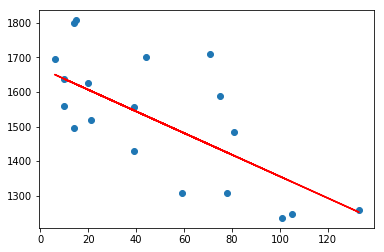

In [234]:
# для начала построим график с предсказанной линией тренда нашей модели
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
# сначала мы показываем распределение нашей тестовой выборки
# далее накладываем на график линию тренда со значением X_test и предсказанному по этой выборке значений y_pred

In [ ]:
# для того, чтобы построить изображение остатков, необходимо из прогноза y_pred, 
# (который мы получили на основании X_test) вычесть факт y_test

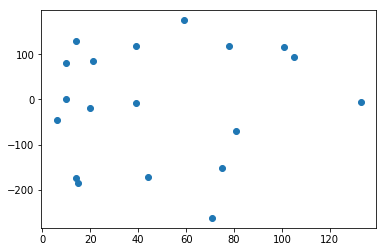

In [274]:
remains = y_pred - y_test
plt.scatter(X_test, remains)
# видим, что на построенной визуализации точки расположены хаотично, это говорит о том,
# что наша модель не имеет выраженной зависимости, закономерностей

(array([1., 2., 2., 0., 2., 3., 1., 2., 5., 1.]),
 array([-2.62376334e+02, -2.18618329e+02, -1.74860324e+02, -1.31102319e+02,
        -8.73443140e+01, -4.35863090e+01,  1.71696085e-01,  4.39297011e+01,
         8.76877062e+01,  1.31445711e+02,  1.75203716e+02]),
 <a list of 10 Patch objects>)

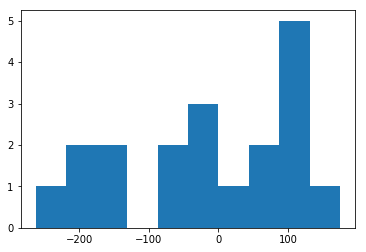

In [270]:
#распределение остатков можно назвать условно нормальным с длинным левым хвостом
plt.hist(ost)

### 2 Задание.
* Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

##### Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

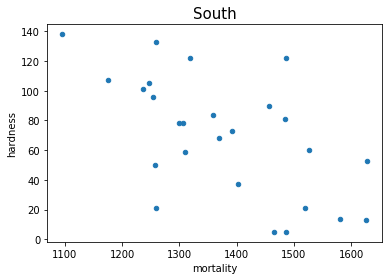

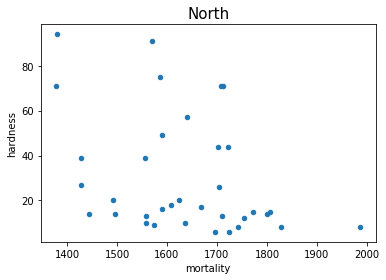

In [315]:
# посмотрим на то, как зависит жесткость воды и сред год смерт от расположения городов
for i in water['location'].unique():
    water[water['location'] == i].plot(kind='scatter', x='mortality', y='hardness')
    plt.title(i, fontsize=15)
# в целом можно сказать, что линейная связь между величинами есть, но не такая заметная, как если смотреть в целом
# видно, что при макс и мин значениях жесткости воды наблюдается одинаковая смертность
# по городам такой анализ делать смысла нет, так как данные представлены, как один город - одно значение

##### Разделить данные на 2 группы
##### Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [339]:
# 1 группа South
water_south = water[water['location'] == 'South']

In [340]:
X_water_south = water_south[['hardness']] 
y_water_south = water_south['mortality']

In [357]:
X_train, X_test, y_train, y_test = train_test_split(X_water_south, y_water_south, test_size=0.4, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)
# тут мы получаем отрицательный коэфф детерминции R квадрат
# это говорит о том, что наша модель работает хуже, чем прогноз по среднему
# видно, что существует большой разброс величин y без видимой зависимости от X
# к примеру одинаковая смертность наблюдается как при мин значениях жесткости воды, так и при максимальных
# при размере тестовой выборки 0.3 наблюдается снижение коэфф детерминации, решил сделать 0.4 и коэфф увеличился 
# с -2.3 до -0.7 

-0.7912771733269202

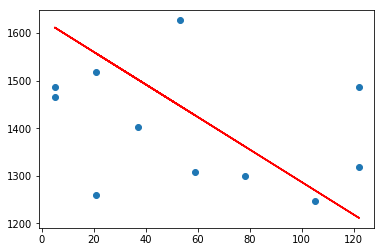

In [358]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

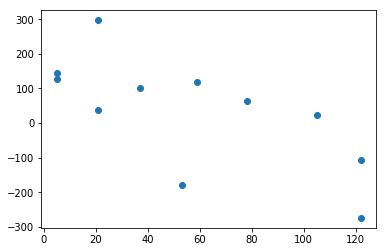

In [359]:
# остатки 
remains = y_pred - y_test
plt.scatter(X_test, remains)
# в целом можно сказать, что остатки распределены случайно и не имеют какой либо зависимости от величин

In [360]:
# 2 группа north
water_north = water[water['location'] == 'North']

In [361]:
X_water_north = water_north[['hardness']] 
y_water_north = water_north['mortality']

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X_water_north, y_water_north, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)
# тут ситуация лучше, но все же сохраняется тенденция низкого коэфф детерминации
# вывод можно сделать такой же, как и по выборке South, 

0.018885304285745863

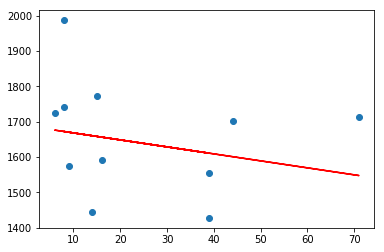

In [363]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

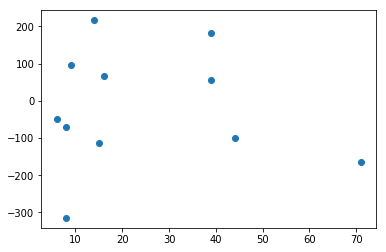

In [364]:
# остатки 
remains = y_pred - y_test
plt.scatter(X_test, remains)
# в целом можно сказать, что остатки распределены случайно и не имеют какой либо зависимости от величин

In [365]:
# Если делать вывод о наших моделях, то в целом смертность от жесткости воды не зависит от региона, 
# при этом есть более заметная зависимость в сумме по двум регионам, но не очень высокая